# Continuous Target and Time Series Regression

From here: https://dmbee.github.io/seglearn/auto_examples/plot_regression.html

## Overview

In this example, we use the pipeline to learn a continuous time series target with a regressor.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [2]:
from seglearn.pipe import Pype
from seglearn.split import (
    # Not these two:
    temporal_split, 
    TemporalKFold
)
from seglearn.transform import (
    FeatureRep, 
    Segment, 
    last  # This is new.
)

In [3]:
# for a single time series, we need to make it a list
X = [np.arange(10000) / 100.]
y = [np.sin(X[0]) * X[0] * 3 + X[0] * X[0]]

In [10]:
print(len(X))
print(X[0].shape)

1
(10000,)


In [8]:
print(len(y))
print(y[0].shape)

1
(10000,)


In [9]:
# split the data along the time axis (our only option since we have only 1 time series)
X_train, X_test, y_train, y_test = temporal_split(X, y)

In [12]:
print(len(X_train))
print(X_train[0].shape)

1
(7500,)


In [13]:
print(len(y_test))
print(y_test[0].shape)

1
(2500,)


In [14]:
# ⚠️ setting y_func = last, selects the last value from each y segment as the target
# other options include transform.middle, or you can make your own function
# see the API documentation for further details
pipe = Pype(
    [
        ('seg', Segment(width=200, overlap=0.5, y_func=last)),
        ('features', FeatureRep()),
        ('lin', LinearRegression())
    ]
)

/mnt/space/miniconda3/envs/py38_playaround-sk/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass memory=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [15]:
# fit and score
pipe.fit(X_train, y_train)

Pype(steps=[('seg', Segment(width=200)),
            ('features',
             FeatureRep(features={'abs_energy': <function abs_energy at 0x7f78f7fe7e50>,
                                  'kurt': <function kurt at 0x7f78f7ff2310>,
                                  'max': <function maximum at 0x7f78f7ff21f0>,
                                  'mean': <function mean at 0x7f78f7fe7af0>,
                                  'median': <function median at 0x7f78f7fe7b80>,
                                  'min': <function minimum at 0x7f78f7ff2160>,
                                  'mnx': <function mean_crossings at 0x7f78f7ff2550>,
                                  'mse': <function mse at 0x7f78f7ff24c0>,
                                  'skew': <function skew at 0x7f78f7ff2280>,
                                  'std': <function std at 0x7f78f7fe7ee0>,
                                  'var': <function var at 0x7f78f7fe7f70>})),
            ('lin', LinearRegression())])

In [17]:
score = pipe.score(X_test, y_test)
score

0.9738870490410149

In [18]:
print("N series in train: ", len(X_train))
print("N series in test: ", len(X_test))
print("N segments in train: ", pipe.N_train)
print("N segments in test: ", pipe.N_test)
print("Score: ", score)

N series in train:  1
N series in test:  1
N segments in train:  74
N segments in test:  24
Score:  0.9738870490410149


In [19]:
# generate some predictions
# ⚠️ Looks like seglearn implements a custom transform_predict function on their Pype. 
ytr, ytr_p = pipe.transform_predict(X_train, y_train)  # training predictions
yte, yte_p = pipe.transform_predict(X_test, y_test)  # test predictions
xtr = np.arange(len(ytr))  # segment number
xte = np.arange(len(yte)) + len(xtr)

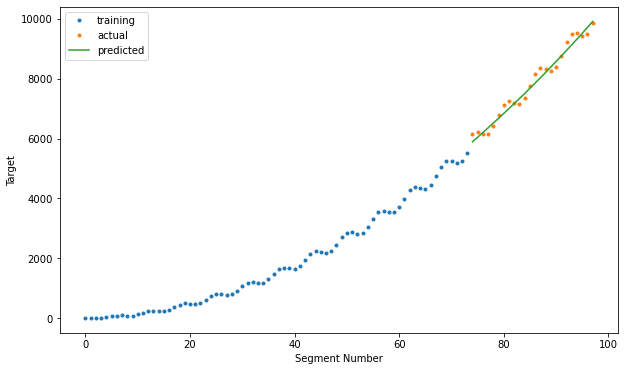

In [21]:
# plot the amazing results
plt.figure(figsize=(10,6))
plt.plot(xtr, ytr, '.', label="training")
plt.plot(xte, yte, '.', label="actual")
plt.plot(xte, yte_p, label="predicted")
plt.xlabel("Segment Number")
plt.ylabel("Target")
plt.legend()
plt.show()

In [30]:
# now try a cross validation
X = [np.arange(4000) / 100.]
y = [np.sin(X[0])]

In [31]:
print(X[0].shape)
print(y[0].shape)

(4000,)
(4000,)


In [32]:
tkf = TemporalKFold(n_splits=3)
X, y, cv = tkf.split(X, y)

In [33]:
print(X[0].shape)
print(y[0].shape)

(1333,)
(1333,)


In [45]:
print("\ncv:")
print(type(cv))
print(len(cv))
print("\ncv[0]:")
print(type(cv[0]))
print(len(cv[0]))
print("\ncv[0][0]:")
print(type(cv[0][0]))
print(cv[0][0].shape)
print(cv[0][0])

print()
print(cv)


cv:
<class 'list'>
3

cv[0]:
<class 'tuple'>
2

cv[0][0]:
<class 'numpy.ndarray'>
(2,)
[1 2]

[(array([1, 2]), array([0])), (array([0, 2]), array([1])), (array([0, 1]), array([2]))]


In [47]:
cv_scores = cross_validate(pipe, X, y, cv=cv, return_train_score=True)
print("CV Scores:\n", pd.DataFrame(cv_scores))

CV Scores:
    fit_time  score_time  test_score  train_score
0  0.003984    0.001412   -0.179475     0.057730
1  0.003183    0.001263   -0.149984     0.126310
2  0.003026    0.001205   -0.239356     0.097838


/mnt/space/miniconda3/envs/py38_playaround-sk/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass memory=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/mnt/space/miniconda3/envs/py38_playaround-sk/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass memory=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/mnt/space/miniconda3/envs/py38_playaround-sk/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass memory=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
